In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

In [2]:
df = pd.read_csv('./data/process_data.csv')
df.head()

,Bad,badCd,ptGroupNm,qabDscr,Year,Female,Edu,Skill,Hand,NumberofYear,Married,Chiled,Pregnancy,CommutingTime,Payment,Height,Weight,DutyHours,OverTimeWork
0,1,C0112,MAIN,피복밀림,33.0,1.0,1.0,2.0,1.0,5.0,1.0,1.0,0.0,0.0,5315000.0,155.0,45.0,0.0,0.0
1,0,C0112,MAIN,피복밀림,36.0,1.0,1.0,2.0,1.0,5.0,1.0,1.0,0.0,0.0,4164000.0,153.0,56.0,216.0,0.0
2,0,C0112,MAIN,피복밀림,35.0,1.0,1.0,2.0,1.0,5.0,1.0,1.0,0.0,0.0,4821000.0,151.0,46.0,226.5,0.0
3,0,C0112,MAIN,피복밀림,33.0,1.0,1.0,2.0,1.0,5.0,1.0,1.0,0.0,0.0,5315000.0,155.0,45.0,0.0,0.0
4,0,C0112,MAIN,피복밀림,36.0,1.0,1.0,2.0,1.0,5.0,1.0,1.0,0.0,0.0,4821000.0,150.0,45.0,224.0,0.0


In [3]:
del df['badCd']
del df['ptGroupNm']
del df['qabDscr']

data = np.array(df)
nvar = data.shape[1]
datax = data[:,1:nvar]
datay = data[:,0]

In [4]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(datax, datay, test_size=0.3, random_state=500)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

## 분석 결과 모두 사용하지 않는 경우 prior 고려

In [6]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB(priors=[0.55, 0.45])
bayes.fit(train_x,train_y)
predict = bayes.predict(test_x)

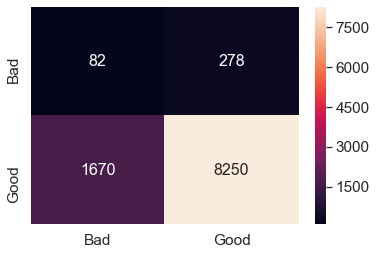

In [7]:
from sklearn.metrics import confusion_matrix

array = confusion_matrix(test_y, predict)
array = [[array[1][1],array[1][0]],[array[0][1],array[0][0]]]
array = np.array(array)
df_cm = pd.DataFrame(array,['Bad','Good'],['Bad','Good'])
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt = 'd')
plt.show()

In [8]:
TP = array[0][0]
FN = array[0][1]
FP = array[1][0]
TN = array[1][1]

acc1 = (TP+TN)/(TP+TN+FP+FN)
sen1 = TP/(TP+FN)
pre1 = TP/(TP+FP)
print('Confusion Matrix 분석\n')
print('Accuracy = ', acc1)
print('Sensitivity = ', sen1)
print('False Alarm = ', pre1)

Confusion Matrix 분석

Accuracy =  0.8105058365758755
Sensitivity =  0.22777777777777777
False Alarm =  0.04680365296803653


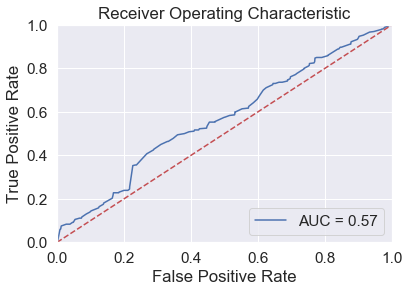

In [9]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = bayes.predict_proba(test_x)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(test_y, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 로지스틱 회귀분석을 통한 p-Value만 고려하여 사용한 경우

In [10]:
df.columns

Index(['Bad', 'Year', 'Female', 'Edu', 'Skill', 'Hand', 'NumberofYear',
       'Married', 'Chiled', 'Pregnancy', 'CommutingTime', 'Payment', 'Height',
       'Weight', 'DutyHours', 'OverTimeWork'],
      dtype='object')

In [11]:
import statsmodels.api as sm
x = df[['Year', 'Female', 'Edu', 'Skill', 'Hand', 'NumberofYear',
       'Married', 'Chiled', 'Pregnancy', 'CommutingTime', 'Payment', 'Height',
       'Weight', 'DutyHours', 'OverTimeWork']]
x2 = sm.add_constant(x)
model = sm.OLS(datay,x2)
result = model.fit()
result.summary()

C:\Users\KimJinSeop\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     18.46
Date:                Thu, 05 Dec 2019   Prob (F-statistic):           5.69e-50
Time:                        16:27:40   Log-Likelihood:                 9902.1
No. Observations:               34266   AIC:                        -1.977e+04
Df Residuals:                   34250   BIC:                        -1.964e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2688      0.110      2.455      0.014       0.054       0.483
Year              0.0010      0.000      3.904      0.000       0.001       0.002
Female           -0.2784      0.105     -2.653      0.008      -0.484      -0.073
Edu               0.0013      0.002      0.510      0.610      -0.004       0.006
Skill             0.0150      0.005      3.214      0.001       0.006       0.024
Hand             -0.0036      0.007     -0.489      0.625      -0.018       0.011
NumberofYear     -0.0065      0.002     -3.073      0.002      -0.011      -0.002
Married          -0.0223      0.006     -3.961      0.000      -0.033      -0.011
Chiled            0.0251      0.004      6.295      0.000       0.017       0.033
Pregnancy         0.0217      0.006      3.843      0.000       0.011       0.033
CommutingTime     0.0652      0.005     11.925      0.000       0.054       0.076
Payment         -3.9e-09   2.95e-09     -1.323      0.186   -9.68e-09    1.88e-09
Height           -0.0002      0.000     -1.721      0.085      -0.001    3.45e-05
Weight            0.0012      0.000      5.667      0.000       0.001       0.002
DutyHours      1.946e-05   2.74e-05      0.710      0.477   -3.42e-05    7.31e-05
OverTimeWork     -0.0080      0.002     -3.362      0.001      -0.013      -0.003
==============================================================================
Omnibus:                    33210.220   Durbin-Watson:                   1.334
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           960350.771
Skew:                           5.062   Prob(JB):                         0.00
Kurtosis:                      26.877   Cond. No.                     6.48e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.48e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
index = 0
columes = ""
for pval in result.pvalues:
    if(index == 0):
        index = index + 1
        continue
    if(pval < 0.05):
        columes = columes + "'"+ x.columns[index-1] + "',"
    index = index + 1
print(columes)

'Year','Female','Skill','NumberofYear','Married','Chiled','Pregnancy','CommutingTime','Weight','OverTimeWork',


In [13]:
da = df[['Bad','Year','Female','Skill','NumberofYear','Married','Chiled','Pregnancy','CommutingTime','Weight','OverTimeWork']]
da.head()

,Bad,Year,Female,Skill,NumberofYear,Married,Chiled,Pregnancy,CommutingTime,Weight,OverTimeWork
0,1,33.0,1.0,2.0,5.0,1.0,1.0,0.0,0.0,45.0,0.0
1,0,36.0,1.0,2.0,5.0,1.0,1.0,0.0,0.0,56.0,0.0
2,0,35.0,1.0,2.0,5.0,1.0,1.0,0.0,0.0,46.0,0.0
3,0,33.0,1.0,2.0,5.0,1.0,1.0,0.0,0.0,45.0,0.0
4,0,36.0,1.0,2.0,5.0,1.0,1.0,0.0,0.0,45.0,0.0


In [14]:
data = np.array(da)
nvar = data.shape[1]
datax = data[:,1:nvar]
datay = data[:,0]

In [15]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(datax, datay, test_size=0.3, random_state=500)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [17]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB(priors=[0.59, 0.41])
bayes.fit(train_x,train_y)
predict = bayes.predict(test_x)

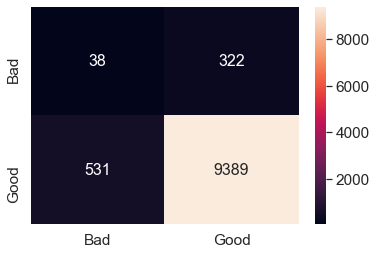

In [18]:
from sklearn.metrics import confusion_matrix

array = confusion_matrix(test_y, predict)
array = [[array[1][1],array[1][0]],[array[0][1],array[0][0]]]
array = np.array(array)
df_cm = pd.DataFrame(array,['Bad','Good'],['Bad','Good'])
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt = 'd')
plt.show()

In [19]:
TP = array[0][0]
FN = array[0][1]
FP = array[1][0]
TN = array[1][1]
acc2 = (TP+TN)/(TP+TN+FP+FN)
sen2 = TP/(TP+FN)
pre2 = TP/(TP+FP)
print('Confusion Matrix 분석\n')
print('Accuracy = ', acc2)
print('Sensitivity = ', sen2)
print('Precision = ', pre2)

Confusion Matrix 분석

Accuracy =  0.9170233463035019
Sensitivity =  0.10555555555555556
Precision =  0.06678383128295255


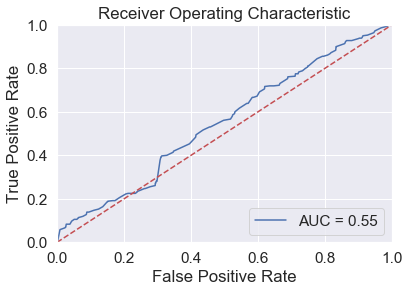

In [20]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = bayes.predict_proba(test_x)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(test_y, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## RandomForest로 분석한 결과만 활용한 경우

In [21]:
data = np.array(df)
nvar = data.shape[1]
datax = data[:,1:nvar]
datay = data[:,0]

In [22]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(datax, datay, test_size=0.3, random_state=500)

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 50)
rf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
df.columns

Index(['Bad', 'Year', 'Female', 'Edu', 'Skill', 'Hand', 'NumberofYear',
       'Married', 'Chiled', 'Pregnancy', 'CommutingTime', 'Payment', 'Height',
       'Weight', 'DutyHours', 'OverTimeWork'],
      dtype='object')

In [26]:
Importance = np.round(rf.feature_importances_,2)
TrainColume = ('Year', 'Female', 'Edu', 'Skill', 'Hand', 'NumberofYear',
       'Married', 'Chiled', 'Pregnancy', 'CommutingTime', 'Payment', 'Height',
       'Weight', 'DutyHours', 'OverTimeWork')
df_data ={'Imt' : Importance, 'Colume' : TrainColume}
df_data = pd.DataFrame(df_data)

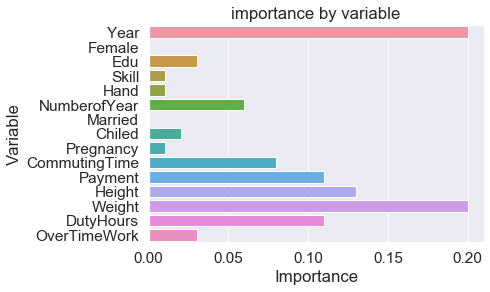

In [27]:
import seaborn as sns
ax = sns.barplot(x=df_data['Imt'], y=df_data['Colume'])
ax.set(xlabel='Importance', ylabel='Variable')
plt.title('importance by variable')
plt.show()

In [28]:
del df['Female']
del df['Skill']
del df['Married']

In [29]:
data = np.array(df)
nvar = data.shape[1]
datax = data[:,1:nvar]
datay = data[:,0]

In [30]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(datax, datay, test_size=0.3, random_state=500)

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [32]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB(priors=[0.59, 0.41])
bayes.fit(train_x,train_y)
predict = bayes.predict(test_x)

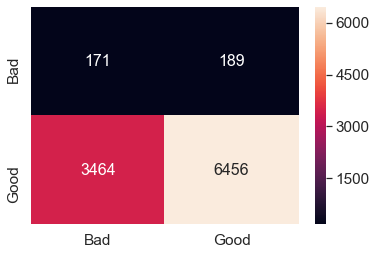

In [33]:
from sklearn.metrics import confusion_matrix

array = confusion_matrix(test_y, predict)
array = [[array[1][1],array[1][0]],[array[0][1],array[0][0]]]
array = np.array(array)
df_cm = pd.DataFrame(array,['Bad','Good'],['Bad','Good'])
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt = 'd')
plt.show()

In [34]:
TP = array[0][0]
FN = array[0][1]
FP = array[1][0]
TN = array[1][1]
acc3 = (TP+TN)/(TP+TN+FP+FN)
sen3 = TP/(TP+FN)
pre3 = TP/(TP+FP)
print('Confusion Matrix 분석\n')
print('Accuracy = ', acc3)
print('Precision = ', pre3)

Confusion Matrix 분석

Accuracy =  0.6446498054474709
Precision =  0.04704264099037139


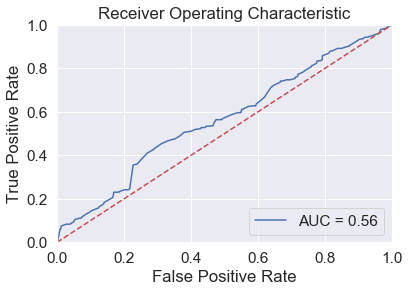

In [35]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = bayes.predict_proba(test_x)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(test_y, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 두가지 방법으로 분석한 결과를 모두 활용한 경우

In [36]:
df.columns

Index(['Bad', 'Year', 'Edu', 'Hand', 'NumberofYear', 'Chiled', 'Pregnancy',
       'CommutingTime', 'Payment', 'Height', 'Weight', 'DutyHours',
       'OverTimeWork'],
      dtype='object')

In [37]:
import statsmodels.api as sm
x = df[['Year', 'Edu', 'Hand', 'NumberofYear', 'Chiled', 'Pregnancy',
       'CommutingTime', 'Payment', 'Height', 'Weight', 'DutyHours',
       'OverTimeWork']]
x2 = sm.add_constant(x)
model = sm.OLS(datay,x2)
result = model.fit()
result.summary()

C:\Users\KimJinSeop\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     20.31
Date:                Thu, 05 Dec 2019   Prob (F-statistic):           4.09e-45
Time:                        16:27:43   Log-Likelihood:                 9885.6
No. Observations:               34266   AIC:                        -1.975e+04
Df Residuals:                   34253   BIC:                        -1.964e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0185      0.027      0.693      0.488      -0.034       0.071
Year              0.0007      0.000      2.929      0.003       0.000       0.001
Edu               0.0005      0.002      0.211      0.833      -0.004       0.005
Hand             -0.0019      0.007     -0.261      0.794      -0.016       0.013
NumberofYear     -0.0024      0.002     -1.426      0.154      -0.006       0.001
Chiled            0.0158      0.003      4.861      0.000       0.009       0.022
Pregnancy         0.0152      0.005      2.781      0.005       0.004       0.026
CommutingTime     0.0622      0.005     11.485      0.000       0.052       0.073
Payment       -6.623e-09   2.77e-09     -2.390      0.017   -1.21e-08   -1.19e-09
Height           -0.0002      0.000     -1.451      0.147      -0.000    7.32e-05
Weight            0.0008      0.000      4.141      0.000       0.000       0.001
DutyHours      3.684e-05   2.71e-05      1.359      0.174   -1.63e-05       9e-05
OverTimeWork     -0.0050      0.002     -2.240      0.025      -0.009      -0.001
==============================================================================
Omnibus:                    33235.312   Durbin-Watson:                   1.334
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           962506.971
Skew:                           5.068   Prob(JB):                         0.00
Kurtosis:                      26.904   Cond. No.                     1.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
index = 0
columes = ""
for pval in result.pvalues:
    if(index == 0):
        index = index + 1
        continue
    if(pval < 0.05):
        columes = columes + "'"+ x.columns[index-1] + "',"
    index = index + 1
print(columes)

'Year','Chiled','Pregnancy','CommutingTime','Payment','Weight','OverTimeWork',


In [39]:
df = df[['Bad','Year','Chiled','Pregnancy','CommutingTime','Payment','Weight','OverTimeWork']]
df.head()

,Bad,Year,Chiled,Pregnancy,CommutingTime,Payment,Weight,OverTimeWork
0,1,33.0,1.0,0.0,0.0,5315000.0,45.0,0.0
1,0,36.0,1.0,0.0,0.0,4164000.0,56.0,0.0
2,0,35.0,1.0,0.0,0.0,4821000.0,46.0,0.0
3,0,33.0,1.0,0.0,0.0,5315000.0,45.0,0.0
4,0,36.0,1.0,0.0,0.0,4821000.0,45.0,0.0


In [40]:
data = np.array(df)
nvar = data.shape[1]
datax = data[:,1:nvar]
datay = data[:,0]

In [41]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(datax, datay, test_size=0.3, random_state=500)

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [43]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB(priors=[0.59, 0.41])
bayes.fit(train_x,train_y)
predict = bayes.predict(test_x)

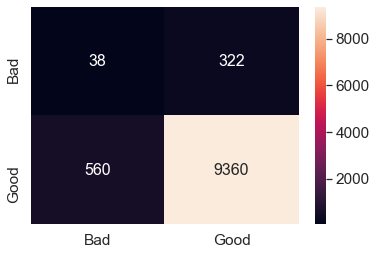

In [44]:
from sklearn.metrics import confusion_matrix

array = confusion_matrix(test_y, predict)
array = [[array[1][1],array[1][0]],[array[0][1],array[0][0]]]
array = np.array(array)
df_cm = pd.DataFrame(array,['Bad','Good'],['Bad','Good'])
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt = 'd')
plt.show()

In [45]:
TP = array[0][0]
FN = array[0][1]
FP = array[1][0]
TN = array[1][1]
acc4 = (TP+TN)/(TP+TN+FP+FN)
sen4 = TP/(TP+FN)
pre4 = TP/(TP+FP)
print('Confusion Matrix 분석\n')
print('Accuracy = ', acc4)
print('Sensitivity = ', sen4)
print('Precision = ', pre4)

Confusion Matrix 분석

Accuracy =  0.9142023346303502
Sensitivity =  0.10555555555555556
Precision =  0.06354515050167224


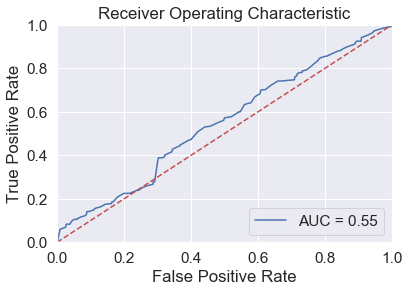

In [46]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = bayes.predict_proba(test_x)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(test_y, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 성능 결과 그래프

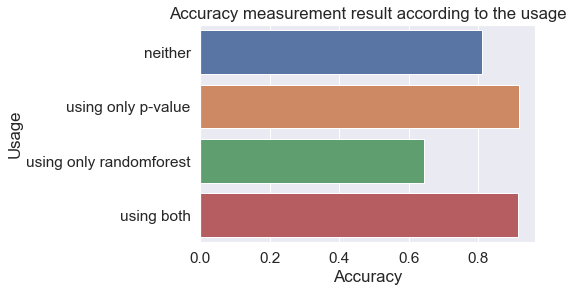

In [47]:
import seaborn as sns
list_ac = [acc1,acc2,acc3,acc4]
list_us = ['neither','using only p-value','using only randomforest','using both']
df_data = {'acc' : list_ac, 'use' : list_us}
df_data = pd.DataFrame(df_data)
ax = sns.barplot(x=df_data['acc'], y=df_data['use'])
ax.set(xlabel='Accuracy', ylabel='Usage')
plt.title('Accuracy measurement result according to the usage')
plt.show()

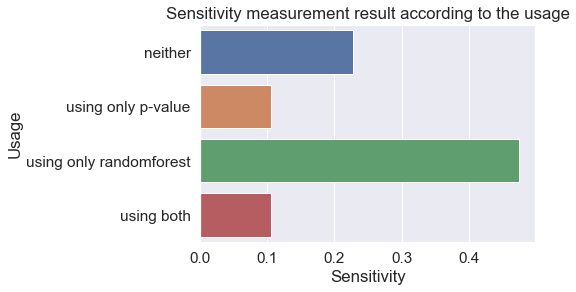

In [48]:
import seaborn as sns
list_se = [sen1,sen2,sen3,sen4]
list_us = ['neither','using only p-value','using only randomforest','using both']
df_data = {'sen' : list_se, 'use' : list_us}
df_data = pd.DataFrame(df_data)
ax = sns.barplot(x=df_data['sen'], y=df_data['use'])
ax.set(xlabel='Sensitivity', ylabel='Usage')
plt.title('Sensitivity measurement result according to the usage')
plt.show()

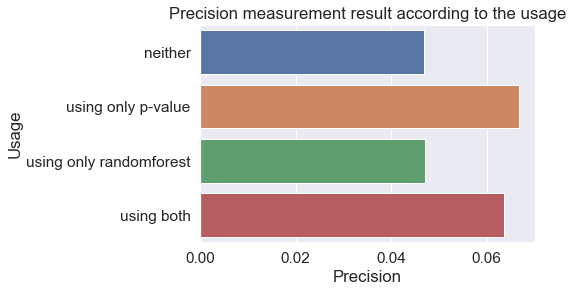

In [49]:
import seaborn as sns
list_pr = [pre1,pre2,pre3,pre4]
list_us = ['neither','using only p-value','using only randomforest','using both']
df_data = {'pre' : list_pr, 'use' : list_us}
df_data = pd.DataFrame(df_data)
ax = sns.barplot(x=df_data['pre'], y=df_data['use'])
ax.set(xlabel='Precision', ylabel='Usage')
plt.title('Precision measurement result according to the usage')
plt.show()